# Part1 :- Read in and subsample CyTOF data
**Open the fcs files within Python and merges the files in a single step w/o having to open the files in Fcs Express or Flowjo.**

### Import packages and enter path to directory with all the data

In [ ]:
from FlowCytometryTools import FCMeasurement
import os
import pandas as pd
pd.set_option("max_columns", 50)

path = input(r"Enter path: ")
os.chdir(path)

### Open files and check if multiple panels are available for analysis

In [3]:
panels = []
for f in os.listdir():
    if ".fcs" in f:
        panels.append(f.split('_')[3])

panels = list(set(panels)) 

print("Panels available:{}" . format(panels))
term = input(r"Select panel to proceed: ")

Panels available:['Tcell']
Select panel to proceed: Tcell


### Open files of the selected panel and subsample the events
**Subampling done such that all samples have the same number of events, n = smallest sample size by defaullt**

In [5]:
sample_size = []
num_files = 0
for f in os.listdir():
    if term in f and f.endswith('.fcs'):
        #print(f)
        datafile = f
        sample = FCMeasurement(ID = 'sample1', datafile= datafile)
        sample_size.append(len(sample.data))
        num_files += 1

print("{} files found".format(num_files))
print("minimum sample size is {}".format(min(sample_size)))

5 files found
minimum sample size is 2163


In [ ]:
# This will need editing based on the names of the columns and file naming scheme to get tissue name

answer = input(r"Type Y to proceed or N to exit: ")

if answer == 'Y':
    print("proceeding to subset the data to include {} cells from each site".format(min(sample_size)))
    opts = input(r"Change default sample size (Y/N): ")
    
    if opts == 'N':
        merged_df = pd.DataFrame()
        for f in os.listdir():
            if term in f and f.endswith('.fcs'):
                datafile = f
                sample = FCMeasurement(ID = 'sample1', datafile= datafile)
                sample_size.append(len(sample.data))
                parameter = sample.channels['$PnS']
                mod_parameters = []
                data_columns = []
                # Here we are cleaning up the column names (markers) to generate user friendly names
                # Edit this based on how column names are defined in your sample
                for p in parameter:
                    if '_' in p and 'dist' not in p and 'Time' not in p and 'Event' not in p and 'DNA' not in p \
                    and 'Osmium' not in p and 'Viability' not in p and 'PD_1' not in p:
                        mod_parameters.append(p.split('_', maxsplit = 1)[1])
                        if len(p.split('_', maxsplit = 1)) > 1 and 'PD_1'not in p:
                            data_columns.append(p.split('_', maxsplit = 1)[0])
                    elif 'PD_1' in p:
                        data_columns.append(p)
                        mod_parameters.append(p)
                    elif '_' not in p and 'dist' not in p and 'Time' not in p and 'Event' not in p and 'DNA' not in p \
                    and 'Osmium' not in p and 'Viability' not in p:
                        data_columns.append(p)
                        mod_parameters.append(p)
                    else:
                        mod_parameters.append(p)
                sample_data = pd.DataFrame(sample.data)
                sample_data.columns = mod_parameters
                sub_data = sample_data.sample(n = min(sample_size))
                # Get tissue name, edit based on file naming scheme
                sub_data['tissue'] = f.split('_')[4]
                merged_df = pd.concat([merged_df, sub_data], axis = 0)

        CD_cols = [dat for dat in data_columns if "CD" in dat]
        sel_cols = CD_cols + ['Perforin', 'PD_1', 'ICOS', 'CCR5', 'Bcl6', 'Tcf1', 'CXCR5', 
                              '41BB', 'CCR7', 'Tbet', 'LAG3', 'CXCR4', 'HLADR', 'TIGIT', 
                              'GranzymeB']

        merged_df.reset_index(inplace = True, drop = True)
        print("data merged from {} files".format(num_files))
        print("merged dataset size has {} events".format(len(merged_df)))
        #merged_df.head()
      
    if opts == 'Y':
        sub_num = input(r"Enter number of events to subsample: ")
        sub_num = int(sub_num)
        merged_df = pd.DataFrame()
        for f in os.listdir():
            if term in f:
                sample = FCMeasurement(ID = 'sample1', datafile= datafile)
                sample_size.append(len(sample.data))
                parameter = sample.channels['$PnS']
                mod_parameters = []
                data_columns = []
                # Here we are cleaning up the column names (markers) to generate user friendly names
                # Edit this based on how column names are defined in your sample
                for p in parameter:
                    if '_' in p and 'dist' not in p and 'Time' not in p and 'Event' not in p and 'DNA' not in p \
                    and 'Osmium' not in p and 'Viability' not in p and 'PD_1' not in p:
                        mod_parameters.append(p.split('_', maxsplit = 1)[1])
                        if len(p.split('_', maxsplit = 1)) > 1 and 'PD_1'not in p:
                            data_columns.append(p.split('_', maxsplit = 1)[0])
                    elif 'PD_1' in p:
                        data_columns.append(p)
                        mod_parameters.append(p)
                    elif '_' not in p and 'dist' not in p and 'Time' not in p and 'Event' not in p and 'DNA' not in p \
                    and 'Osmium' not in p and 'Viability' not in p:
                        data_columns.append(p)
                        mod_parameters.append(p)
                    else:
                        mod_parameters.append(p)
                sample_data = pd.DataFrame(sample.data)
                sample_data.columns = mod_parameters
                sub_data = sample_data.sample(n = sub_num)
                # Get tissue name, edit based on file naming scheme
                sub_data['tissue'] = f.split('_')[4]
                merged_df = pd.concat([merged_df, sub_data], axis = 0)

        CD_cols = [dat for dat in data_columns if "CD" in dat]
        sel_cols = CD_cols + ['Perforin', 'PD_1', 'ICOS', 'CCR5', 'Bcl6', 'Tcf1', 'CXCR5', 
                              '41BB', 'CCR7', 'Tbet', 'LAG3', 'CXCR4', 'HLADR', 'TIGIT', 
                              'GranzymeB']
        
        merged_df.reset_index(inplace = True, drop = True)
        print("data merged from {} files".format(num_files))
        print("merged dataset size has {} events".format(len(merged_df)))
        #merged_df.head()
        
else:
    print('Exiting application...')
    pass

In [64]:
merged_df.head()

,Time,Event_length,Y89Di,Pd102Di,Viability,Pd104Di,Pd105Di,Pd106Di,Pd108Di,Pd110Di,CD57,In115Di,I127Di,Xe131Di,Cs133Di,Ba138Di,Ce140Di,CD28,CD19,Ce142Di,CD45RA,CD103,CD4,CD8,Perforin,...,CD25,CCR7,CD3,Tbet,CD38,CD95,LAG3,CXCR4,HLADR,TIGIT,Lu176Di,GranzymeB,Ta181Di,Os189Di,DNA,Osmium,DNA,194,195,196,198,Bi209Di,bc_separation_dist,mahalanobis_dist,tissue
0,678863.687500,31.0,1.644429,0.0,12.452891,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,19.252720,12.364757,5.532997,6.940178,6.585875,6.953695,2.256323,0.000000,0.000000,0.000000,...,2.114438,0.000000,5.716796,0.000000,29.449574,23.021252,0.000000,1.301030,13.185744,0.000000,0.824801,0.280875,0.235941,367.370361,1693.931274,1257.528198,2943.985352,4.134477,18.256310,0.000000,17.178755,0.0,0.317572,1.633001,LUNG
1,344297.687500,49.0,0.000000,0.0,1.030773,0.0,0.0,0.0,0.0,0.0,136.279373,18.885765,2.324048,1.598577,0.0,35.332790,1.473806,0.000000,0.575521,0.536843,45.021591,3.172664,8.778118,8.497665,2.459946,...,0.000000,0.704881,99.808327,10.783603,0.749414,14.096554,0.341005,45.632271,7.302601,1.460938,18.031269,18.224735,2.223900,53.963615,368.964447,144.761993,720.176208,23.295322,137.209961,6.004735,125.702827,0.0,0.575420,8.302142,LUNG
2,840765.375000,38.0,0.000000,0.0,8.770695,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.649493,1.155788,0.0,10.947928,0.000000,0.751330,0.000000,0.000000,0.000000,92.665894,0.000000,180.460419,0.922037,...,0.000000,0.000000,27.046503,7.202489,1.107776,3.990997,0.000000,15.851102,0.000000,2.897931,1.001991,1.942008,0.380340,133.500092,952.348450,423.259796,1686.561646,11.432218,30.058474,3.258576,24.938322,0.0,0.233038,1.343039,LUNG
3,421053.843750,29.0,0.000000,0.0,13.896278,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.671067,0.000000,0.0,25.617542,0.000000,0.339870,1.453699,1.073852,6.920323,0.000000,0.602778,1.595766,0.000000,...,1.300078,10.350548,8.849969,0.000000,83.910950,62.905338,2.421589,6.733943,69.807602,0.000000,1.948328,1.847253,0.421851,403.563324,1371.737793,1095.002563,2339.566895,12.146876,36.503719,5.564388,46.965576,0.0,0.343308,0.738824,LUNG
4,236293.015625,29.0,0.000000,0.0,15.853117,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.088610,4.807065,6.328004,2.358573,2.412254,0.000000,1.679783,0.571873,2.981021,1.631185,...,1.915311,0.929580,0.000000,0.000000,170.067245,72.458672,4.069650,4.290735,5.896380,0.000000,0.696585,0.909045,0.957923,325.176239,1449.983765,815.989746,2705.976807,7.826815,27.805700,2.966603,66.185600,0.0,0.359652,6.153182,LUNG


In [65]:
# Remove CD45 from sel_cols as it is not informative
sel_cols = list(set(sel_cols))
sel_cols.remove('CD45')

# Part 2:- Data transformation and dimensionality reduction
**Arcsin transform the data and run dimensionality reduction using TSNE and UMAP. Then run Louvain clustering to identify cluster of cells**


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import phenograph
import umap
import seaborn as sns
import matplotlib.patches as mpatches

from matplotlib import colors as mcolors
from MulticoreTSNE import MulticoreTSNE as TSNE
from scipy import stats

In [67]:
# Transforming the data
cof = 5 # cofactor for arcsin transformation
trans_data = np.arcsinh(merged_df[sel_cols]/cof)
trans_data.head()

,Tbet,TIGIT,HLADR,CD123,CD27,Bcl6,CD1c,CD45RA,PD_1,CD69,CD56,CCR7,CD103,CXCR5,41BB,CXCR4,CCR5,CD57,CD25,CD28,Perforin,CD66b,Tcf1,LAG3,CD38,CD95,CD16,CD19,ICOS,CD8,CD3,CD127,CD14,CD4,GranzymeB
0,0.000000,0.000000,1.696996,0.000000,0.565838,4.548936,0.000000,1.132587,0.109828,0.224523,0.153296,0.000000,0.437203,0.099043,0.000000,0.257356,1.486710,0.000000,0.411201,0.954779,0.000000,0.789188,0.494618,0.000000,2.473518,2.231717,0.260719,1.131008,0.349959,0.000000,0.979201,0.000000,4.366411,0.000000,0.056145
1,1.511604,0.288182,1.172662,0.173042,0.100105,1.709869,0.671835,2.893921,0.000000,2.505974,0.298781,0.140513,0.598210,0.017804,0.000000,2.907313,3.475793,3.998753,0.000000,0.000000,0.474035,0.000000,0.676259,0.068148,0.149327,1.759704,0.146565,0.114852,1.275002,1.300584,3.687588,3.385288,0.109955,1.328684,2.004797
2,1.161298,0.551242,0.000000,0.650896,0.000000,3.689836,0.461862,0.000000,0.000000,2.944076,2.505732,0.000000,3.613437,0.225402,0.000000,1.870943,2.077204,0.000000,0.000000,0.149706,0.183378,0.000000,0.339759,0.000000,0.219782,0.731262,0.264597,0.000000,0.579623,4.279413,2.389704,1.846079,0.370101,0.000000,0.379245
3,0.000000,0.000000,3.330732,2.188398,0.375344,5.190098,0.230265,1.128685,0.000000,1.161030,1.221237,1.474557,0.000000,0.644207,0.115164,1.106660,2.801269,0.000000,0.257171,0.067922,0.000000,0.532331,0.629719,0.467141,3.514352,3.226916,0.149325,0.286792,0.252536,0.313969,1.335775,0.733281,3.511168,0.120265,0.361524
4,0.000000,0.000000,1.002638,1.031823,0.193457,4.462292,0.000000,0.000000,0.122732,0.435399,0.000000,0.184861,0.329938,0.000000,0.000000,0.777432,1.324286,0.000000,0.374263,1.057302,0.320711,0.000000,0.799701,0.743509,4.220119,3.367914,0.203846,0.455771,0.584478,0.565567,0.000000,0.146510,3.561388,0.114127,0.180822


## Dimensionality reduction using TSNE

In [68]:
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, 
            n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', 
            init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=4)
tsne_embedding = tsne.fit_transform(trans_data.values)

In [69]:
t_data = pd.DataFrame(tsne_embedding, columns = ['t_x', 't_y'])
t_data.head()

,t_x,t_y
0,3.597770,-25.014189
1,9.390791,5.471216
2,22.845692,24.592626
3,15.841476,-15.495996
4,-1.276508,-26.521527


## Dimensionality reduction using UMAP

In [ ]:
umap_embedding = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', n_epochs=None, learning_rate=1.0, 
                           init='spectral', min_dist=0.1, spread=1.0, set_op_mix_ratio=1.0, local_connectivity=1.0,
                           repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, 
                           a=None, b=None, random_state=None, metric_kwds=None, angular_rp_forest=False, 
                           target_n_neighbors=-1, target_metric='categorical', target_metric_kwds=None, 
                           target_weight=0.5, transform_seed=42, verbose=False).fit_transform(trans_data.values)

In [71]:
umap_df = pd.DataFrame(umap_embedding, columns = ['u_x','u_y'])
umap_df.head()

,u_x,u_y
0,5.866962,4.581736
1,-7.496478,1.218129
2,-10.545886,3.798560
3,5.594634,2.337136
4,5.804407,5.434681


## Run phenograph clustering on data

In [72]:
communities, graph, Q = phenograph.cluster(trans_data.values, k = 150)
num_clusters = len(set(communities)) - (1 if -1 in communities else 0)
print(num_clusters)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 7.4553444385528564 seconds
Jaccard graph constructed in 122.9233911037445 seconds
Wrote graph to binary file in 17.133769750595093 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.817754
After 3 runs, maximum modularity is Q = 0.818823
Louvain completed 23 runs in 27.582430124282837 seconds
PhenoGraph complete in 175.63334846496582 seconds
13


In [73]:
post_df = pd.concat([t_data, umap_df], axis=1)
post_df['cluster'] = communities
post_df.head()

,t_x,t_y,u_x,u_y,cluster
0,3.597770,-25.014189,5.866962,4.581736,2
1,9.390791,5.471216,-7.496478,1.218129,10
2,22.845692,24.592626,-10.545886,3.798560,9
3,15.841476,-15.495996,5.594634,2.337136,6
4,-1.276508,-26.521527,5.804407,5.434681,0


## Visualize the clusters

### Define colors that will be used to color clusters

In [74]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
palette = []
for k, v in colors.items():
    if '#' in v:
        palette.append(v)

palette = palette[0::4]
del(palette[0])
del(palette[0])

In [75]:
clust_color = dict(zip(sorted(post_df['cluster'].unique()), palette))
sample_color = post_df['cluster'].map(clust_color)

In [76]:
# Add color and tissue information to post dim-reduction dataframe
post_df['color'] = sample_color
post_df['Tissue'] = merged_df['tissue']
post_df.head()

,t_x,t_y,u_x,u_y,cluster,color,Tissue
0,3.597770,-25.014189,5.866962,4.581736,2,#FF7F50,LUNG
1,9.390791,5.471216,-7.496478,1.218129,10,#FF00FF,LUNG
2,22.845692,24.592626,-10.545886,3.798560,9,#1E90FF,LUNG
3,15.841476,-15.495996,5.594634,2.337136,6,#8B0000,LUNG
4,-1.276508,-26.521527,5.804407,5.434681,0,#FFEBCD,LUNG


### Generate the scatter plot for all samples

In [77]:
def generate_all_scatter(df, embedding):
    if embedding == 'tsne':
        dr = 't'
    if embedding == 'umap':
        dr = 'u'
    
    # Define x and y variables for the plot
    x = df['{}_x'.format(dr)].values
    y = df['{}_y'.format(dr)].values
    clr = df['color']

    sns.set_style('whitegrid')
    plot_kwds = {'alpha' : 0.4, 's' : 15, 'linewidths':0} 
    figure, ax = plt.subplots(figsize=(10,9))
    ax.set_facecolor('k')
    ax.scatter(x, y, c= clr,**plot_kwds)
    clust_col_new = {i:clust_color [i] for i in sorted(df.cluster.unique())}

    # Add labels to each cluster
    for i, label in enumerate(clust_col_new.keys()):
        plt.annotate(label, 
                     df.loc[df['cluster']==label,['{}_x'.format(dr),'{}_y'.format(dr)]].mean(),
                     horizontalalignment='center', verticalalignment='center',
                     size=18, weight='bold', color = 'white')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('{}\nEstimated number of clusters: {}'.format(embedding, num_clusters),fontsize=20)

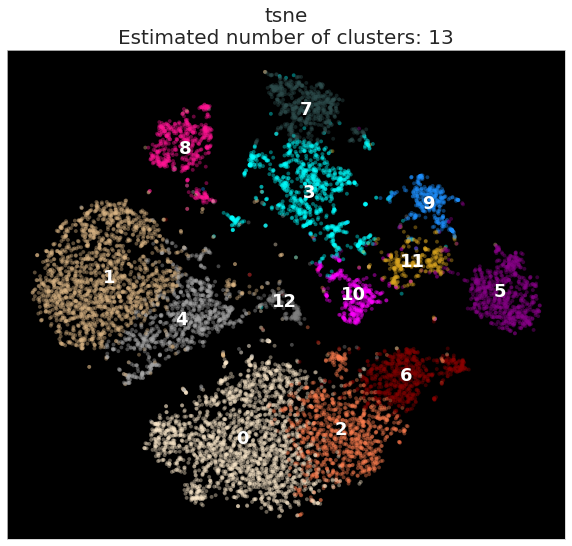

In [78]:
# Call function, provide df with dimensionality reduction results and embedding to plot
generate_all_scatter(post_df, 'tsne')

### Generate tissue-wise scatter plots

In [79]:
def generate_tissue_wise_scatter(df, embedding, tissues):
    if embedding == 'tsne':
        dr = 't'
    if embedding == 'umap':
        dr = 'u'
    
    row = 0
    col = 0
    sns.set(font_scale=4.0)
    sns.set_style('ticks')
    fig, ax = plt.subplots(2,(int(len(tissues)/2) + 1), figsize = (len(tissues)*12,len(tissues)*8))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for tissue in tissues:
        t_df = df[df['Tissue'] == tissue]
        x = t_df['{}_x'.format(dr)].values
        y = t_df['{}_y'.format(dr)].values
        clr = t_df['color']

        ax[row, col].set_facecolor('w')
        ax[row, col].scatter(x, y, s = 50, c= clr)
        ax[row,col].set_facecolor('black')
        ax[row,col].set_title(tissue, size = 80)
        ax[row,col].set_xlim(-max(df['{}_x'.format(dr)])-5, max(df['{}_x'.format(dr)])+5)
        ax[row,col].set_ylim(-max(df['{}_y'.format(dr)])-5, max(df['{}_y'.format(dr)])+5)
        col +=1
        if col == int(len(tissues)/2) + 1:
            col = 0
            row +=1
    plt.show()

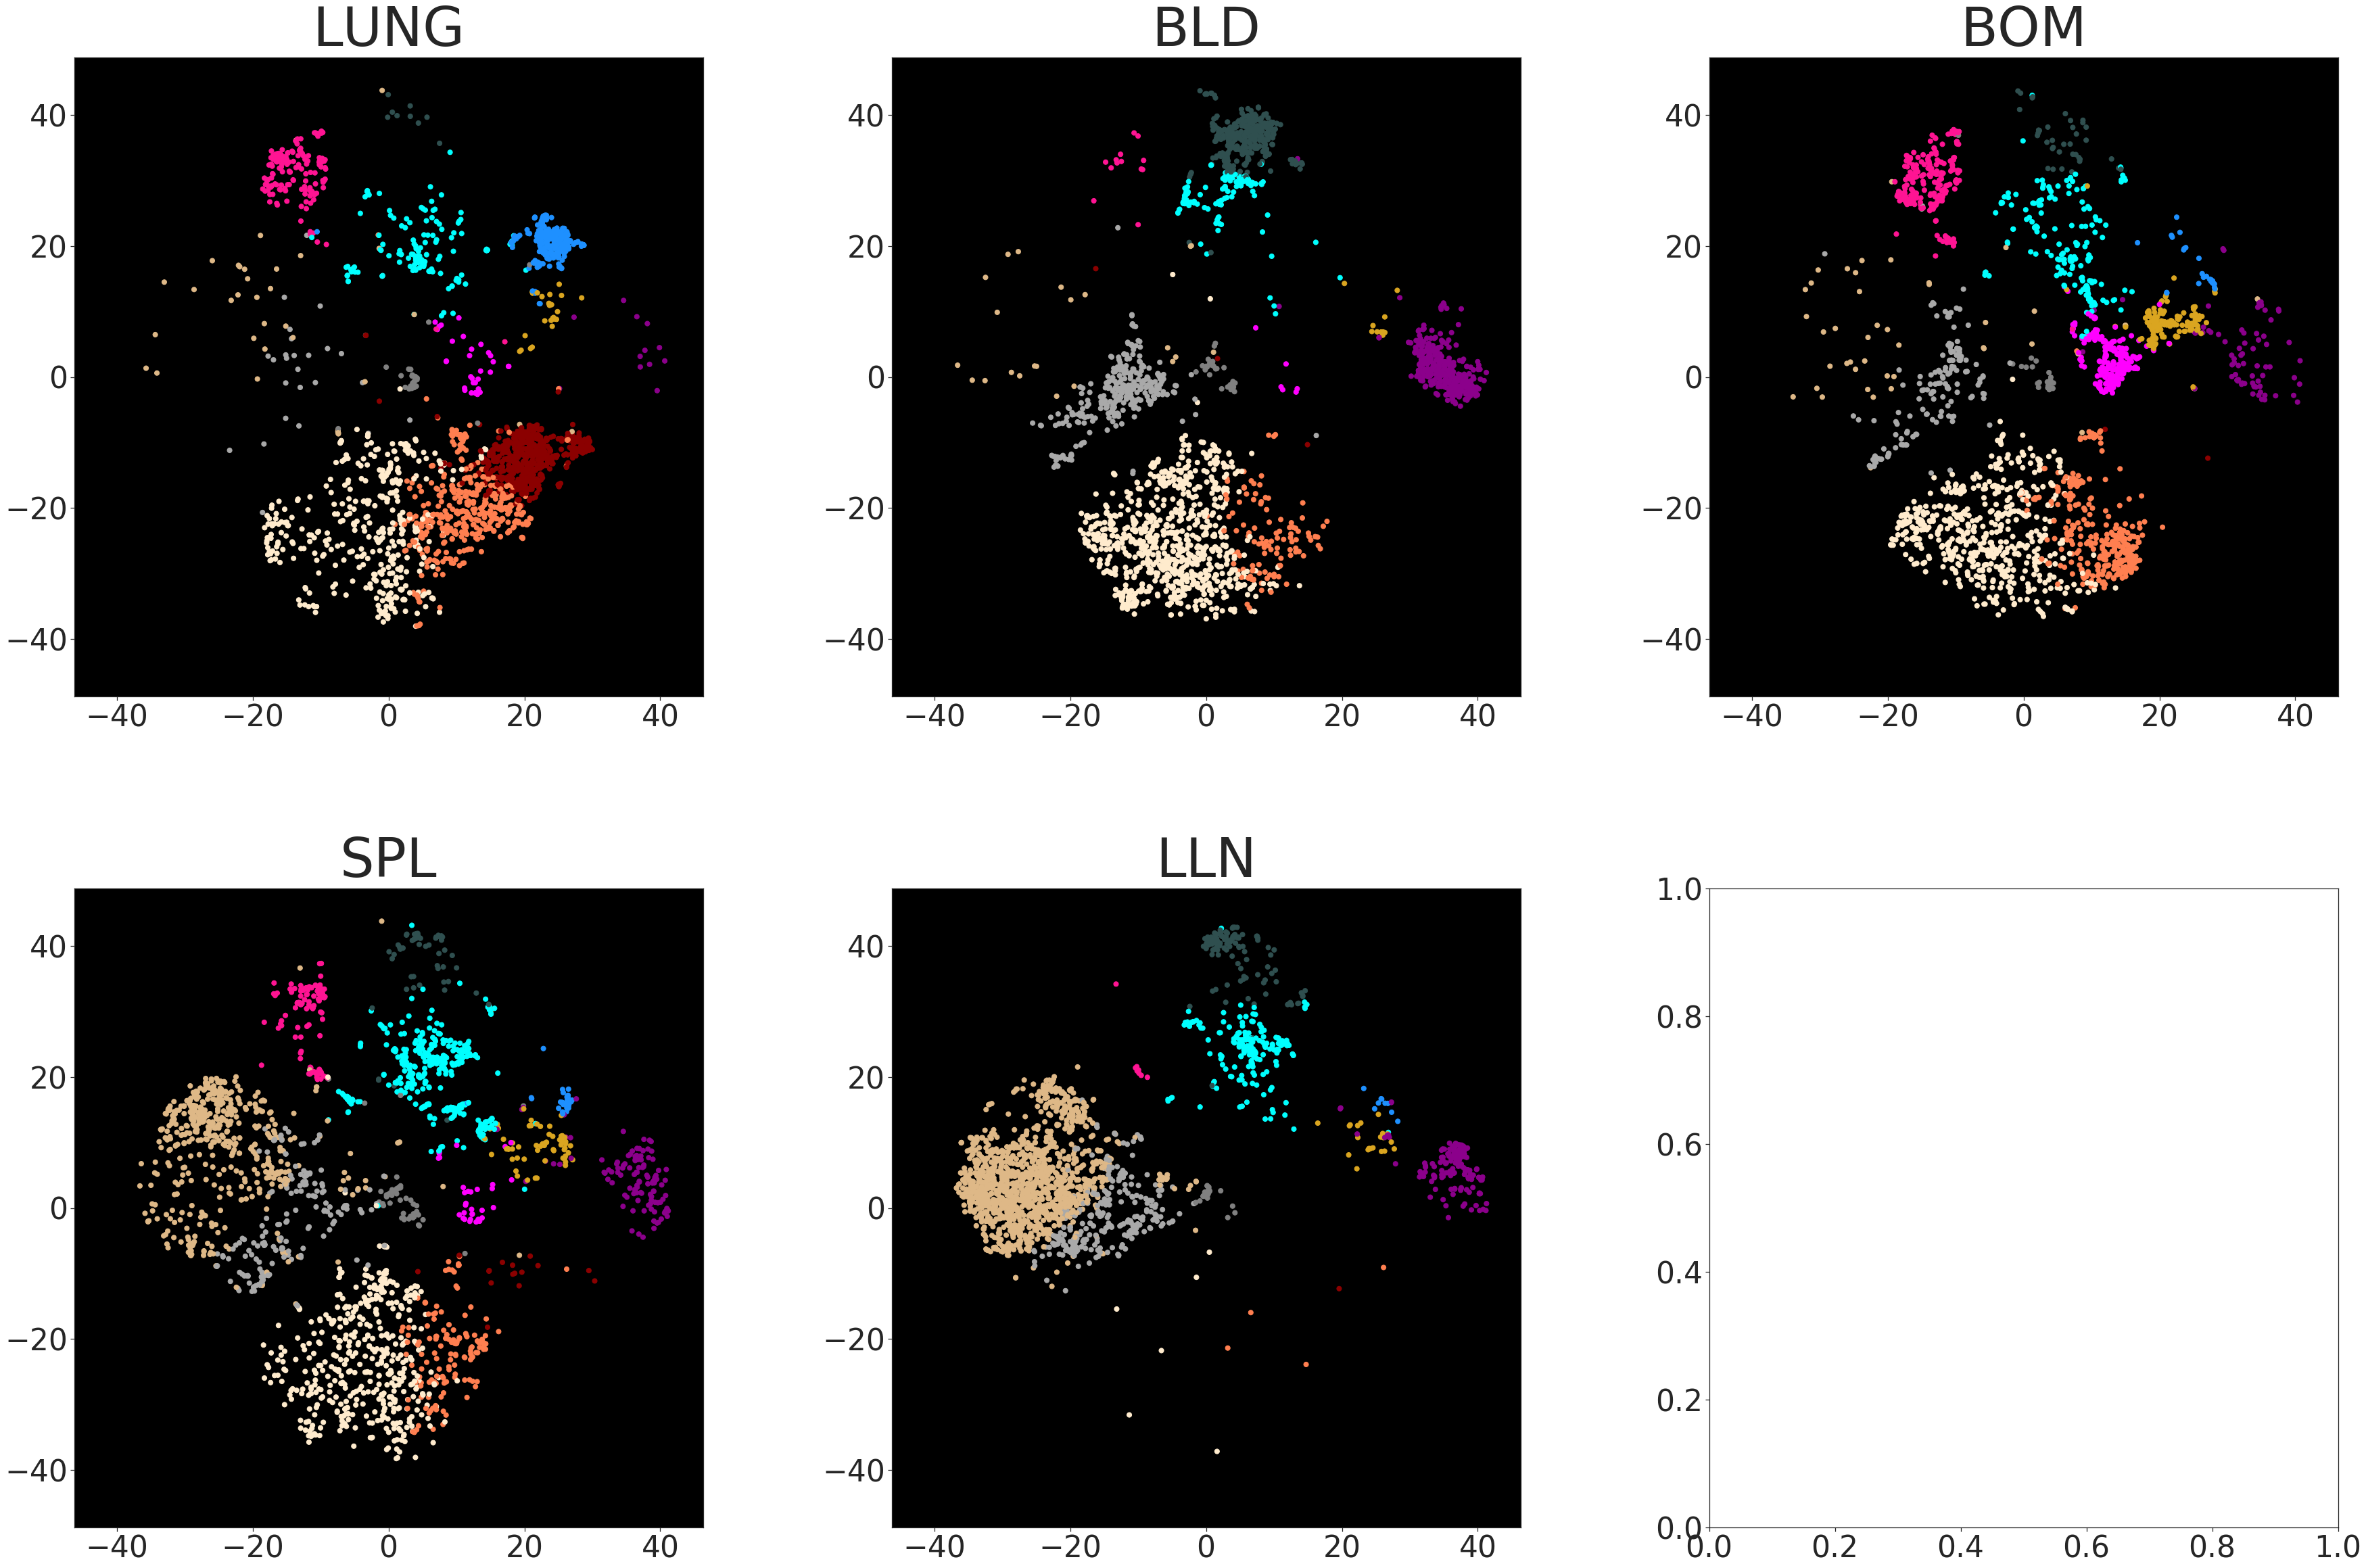

In [80]:
tissues = post_df.Tissue.unique().tolist()
# Call function, provide df with dimensionality reduction results, embedding and list of tissues
generate_tissue_wise_scatter(post_df, 'tsne', tissues)

### Frequency of each cluster in tissues

In [83]:
# Expression data for all the cells
ex_data = pd.concat([trans_data, post_df], axis =1)

In [86]:
def cluster_freq_per_site(df):
    tissues = df.Tissue.unique()
    dict_list = []
    for site in tissues:
        t_df = df[df['Tissue'] == site]
        obs = t_df.cluster.value_counts()
        freq_dict = dict(zip(obs.index, obs.values))
        dict_list.append(freq_dict)
    obs_df = pd.DataFrame(dict_list).T
    obs_df.columns = tissues
    
    # number of observations per site
    total_obs = obs_df.sum(axis=0, skipna=True).tolist()
    
    # calculate percent of each cluster per site
    for site, t_obs in zip(tissues, total_obs):
        obs_df[site] = obs_df[site].apply(lambda x: (x/t_obs)*100)

    obs_df.fillna(0, inplace = True)
    
    # colors for each cluster
    clust_color = dict(zip(sorted(df['cluster'].unique()), palette)) # use palatte that we defined previously
    colors = obs_df.index.map(clust_color)
    
    # generate a cluster map for the data
    sns.set(font_scale=1.2)
    g = sns.clustermap(obs_df[tissues].T, metric = 'cityblock', yticklabels = True, 
                       annot = True, fmt=".1f", vmin = 0, vmax = obs_df.max().max(),
                       cmap='Reds',figsize = (14,3),  annot_kws={"size": 12},
                      col_colors=colors)
    g.cax.set_visible(False)
    plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

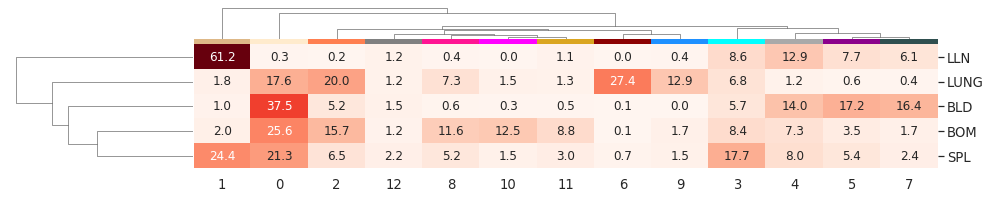

In [87]:
# Call function and provide dataframe that contains cluster tissue information, should have a column names "Tissue"
cluster_freq_per_site(ex_data)

### Bar plot for marker expression levels per cluster

In [88]:
def cluster_bar_plot(df, clusters, markers):
    row = 0
    col = 0
    sns.set(font_scale=1.2)
    sns.set_style('ticks')
    fig, ax = plt.subplots((int(len(markers)/2)),2, figsize = (len(markers),len(markers)*2))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    for m in markers:
        data = df[df['cluster'].isin(clusters)]
        sns.barplot(x = 'cluster', y = m, data = data, alpha = 0.7, errwidth = 0.8,
                    ci = 68, capsize = 0.2, estimator = np.mean, ax = ax[row,col])
        ax[row,col].set_xlabel('Cluster Number')
        ax[row,col].set_ylabel('{} Expression Level'.format(m))
        col +=1
        if col == 2:
            col = 0
            row +=1
    plt.show()

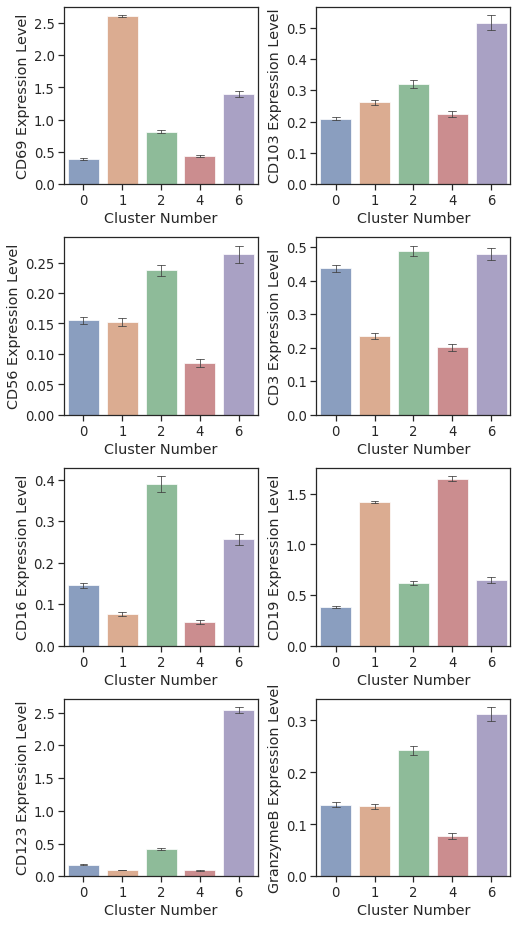

In [89]:
clusters = [0, 6, 4, 1, 2, 17]
markers = ['CD69', 'CD103', 'CD56', 'CD3', 'CD16', 'CD19', 'CD123', 'GranzymeB']

cluster_bar_plot(ex_data, clusters, markers)

# Part3:- Identification of cell clusters of interest

## Generate Heatmap - first heatmap to select cell clusters of interest

### Average expression dataframe

In [90]:
# Average expression
avg_exp = ex_data.groupby('cluster').mean()
avg_exp['cluster'] = avg_exp.index
avg_exp['cluster color'] = avg_exp['cluster'].map(clust_color)

In [91]:
# Write the expression dataframe with cluster info, dim_resuction, tissue info and cluster color to disk
ex_data['Tissue'] = merged_df['tissue']
ex_data.to_csv("Expression_data_dim_clust_tissue.csv", index = False, sep = ',')

### Plot heatmap

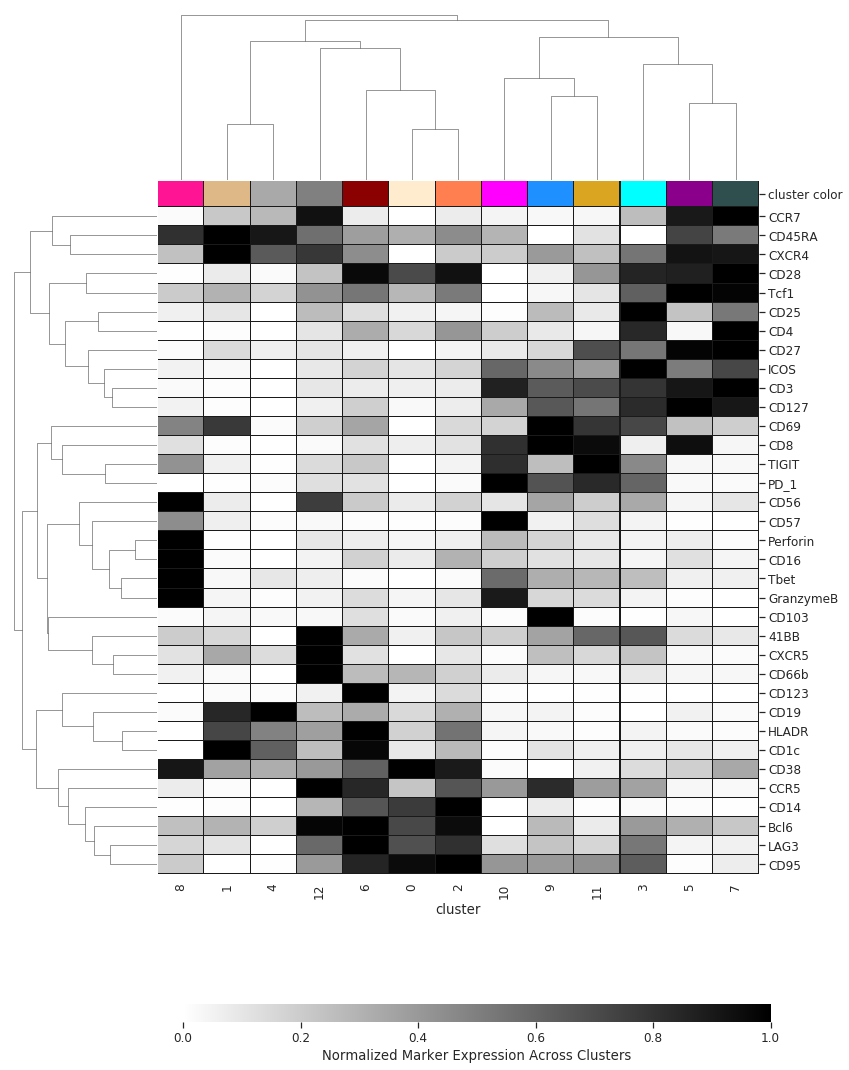

In [93]:
plot_data = avg_exp[sel_cols].T
sns.set(font_scale=1.1)
g = sns.clustermap(plot_data,
                   cbar_kws={'label': 'Normalized Marker Expression Across Clusters', "orientation": "horizontal"},
                   metric="euclidean", standard_scale = 0,linecolor = 'k',
                   figsize=(12, 13), linewidths=0.01, row_cluster= True,
                   col_cluster= True, cmap = 'binary', col_colors= avg_exp['cluster color'])
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
g.cax.set_position((0.22,-0.1,0.68,0.02))

## Generate density plots for markers in clusters - may also help identify cells of interest

### Define function to generate ridge plots

In [94]:
import bokeh
import colorcet as cc
from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_notebook, output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

bokeh.io.reset_output()
#output_file()
output_notebook()

# Function to generate the plots
def ridge(category, data, scale=3):
    return list(zip([category]*len(data), scale*data))


def plot_ridge(df, marker):
    if marker not in ex_data.columns.tolist():
        print("This marker is not available in dataset!\nPlease select another marker.")
        
        pass
    else:
        clusters = sorted(df['cluster'].unique())
        cluster_names = ["Cluster number " + str(c) for c in sorted(df['cluster'].unique())]

        x = linspace((df[marker].values.min() - 20),(df[marker].values.max() + 20), 500)
        source = ColumnDataSource(data=dict(x=x))

        p = figure(y_range=cluster_names, plot_width=900, plot_height = 600, 
                   x_range=(-2, (df[marker].values.max() + 2)), 
                   toolbar_location="above", title = "{} expression across clusters".format(marker))

        for c_num, c_name in zip(clusters, cluster_names):
            data = df[df['cluster'] == c_num]
            data = data[marker].values
            pdf = gaussian_kde(data)
            y = ridge(c_name, pdf(x))
            source.add(y, c_name)
            p.patch('x', c_name, color = palette[c_num], alpha=0.6, line_color="black", source=source)

        p.outline_line_color = None
        p.background_fill_color = "#efefef"

        p.ygrid.grid_line_color = None
        p.xgrid.grid_line_color = "#dddddd"
        p.xgrid.ticker = p.xaxis.ticker

        p.axis.minor_tick_line_color = None
        p.axis.major_tick_line_color = None
        p.axis.axis_line_color = None

        p.y_range.range_padding = 0.2
        show(p)

Loading BokehJS ...

In [118]:
plot_ridge(ex_data, 'CD3')

# Part 4:- Subset data based on clusters of interest

## Enter list of clusters of interest, can enter list of list of clusters if you want to suset two cell types

In [102]:
def create_cell_df(df, cluster_list, cell_types):
    cell_dict = {}
    for clusters, cell in zip(cluster_list, cell_types):
        cell_dict.update([(cell, df[df['cluster'].isin(clusters)])])
        
    return (cell_dict)

In [114]:
cluster_list = [[3,5,7,9,10,11], 
                [8],
                [1, 4]
               ]
cell_types = ['Tcells', 'NKcells', 'Bcells']

# Call function and provide data frame to select from and pass a list of clusters and cell type names.
cell_dict = create_cell_df(ex_data, cluster_list, cell_types)

## Scatter plots

### Plot 2 varibles at a time - enter values manually

In [115]:
def twoD_plot(df, x, y):
    # Variable for x axis
    x_axis = x
    # Variable for y axis
    y_axis = y
    
    sns.set(font_scale=1.1)
    sns.set_style('ticks')
    
    # Generate plot
    x = df[x_axis]
    y = df[y_axis]
    c = df['color'].values
    
    fig, ax = plt.subplots(figsize= (5,5))
    ax.set_facecolor('black')
    ax.scatter(x = x,y = y,c = c, s = 8)
    ax.set_xlim(0,(max(x)+1))
    ax.set_xlabel(x_axis, size = 14)
    ax.set_ylim(0,(max(y)+1))
    ax.set_ylabel(y_axis, size = 14)

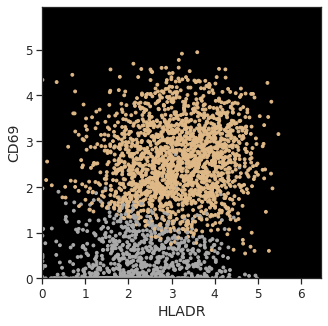

In [117]:
# Call function and provide x-axis marker and y-axis marker
twoD_plot(cell_dict['Bcells'], 'HLADR', 'CD69')

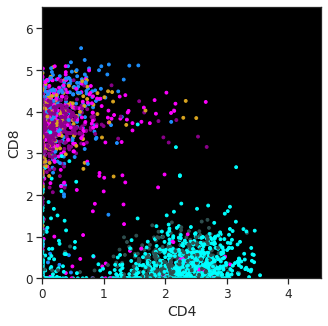

In [109]:
twoD_plot(cell_dict['Tcells'], 'CD4', "CD8")

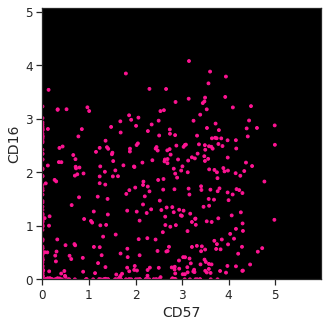

In [111]:
twoD_plot(cell_dict["NKcells"], 'CD57', "CD16")

## Plot 2 variable at a time from a list of markers (arrange in a grid)

In [112]:
def auto_twoD_plots(df, markers):
    from itertools import combinations, permutations
    marker_combs = list(combinations(markers, 2))
    
    # Need to run this to generate grid row and col location
    rows = list(range(0, (len(markers)-1)))
    col = 0

    sub_rows = []
    sub_cols = []

    for row in rows:
        while col < len(rows) - row:
            sub_rows.append(row)
            sub_cols.append(col)
            col +=1
        col = 0
        
    # Generate the plots
    fig, ax = plt.subplots((len(markers)-1),(len(markers)-1), figsize = (((len(markers)-1)*4),((len(markers)-1)*4)))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for row, col, comb in zip(sub_rows, sub_cols, marker_combs):
        x = df[comb[0]]
        y = df[comb[1]]
        c = df['color']

        ax[row,col].scatter(x = x,y = y,c = c, s = 8)
        ax[row,col].set_facecolor('black')
        ax[row,col].set_xlabel(comb[0], size = 12)
        ax[row,col].set_xlim(0,max(x))
        ax[row,col].set_ylabel(comb[1], size = 12)
        ax[row,col].set_ylim(0,max(y))
    plt.tight_layout()
    plt.show()

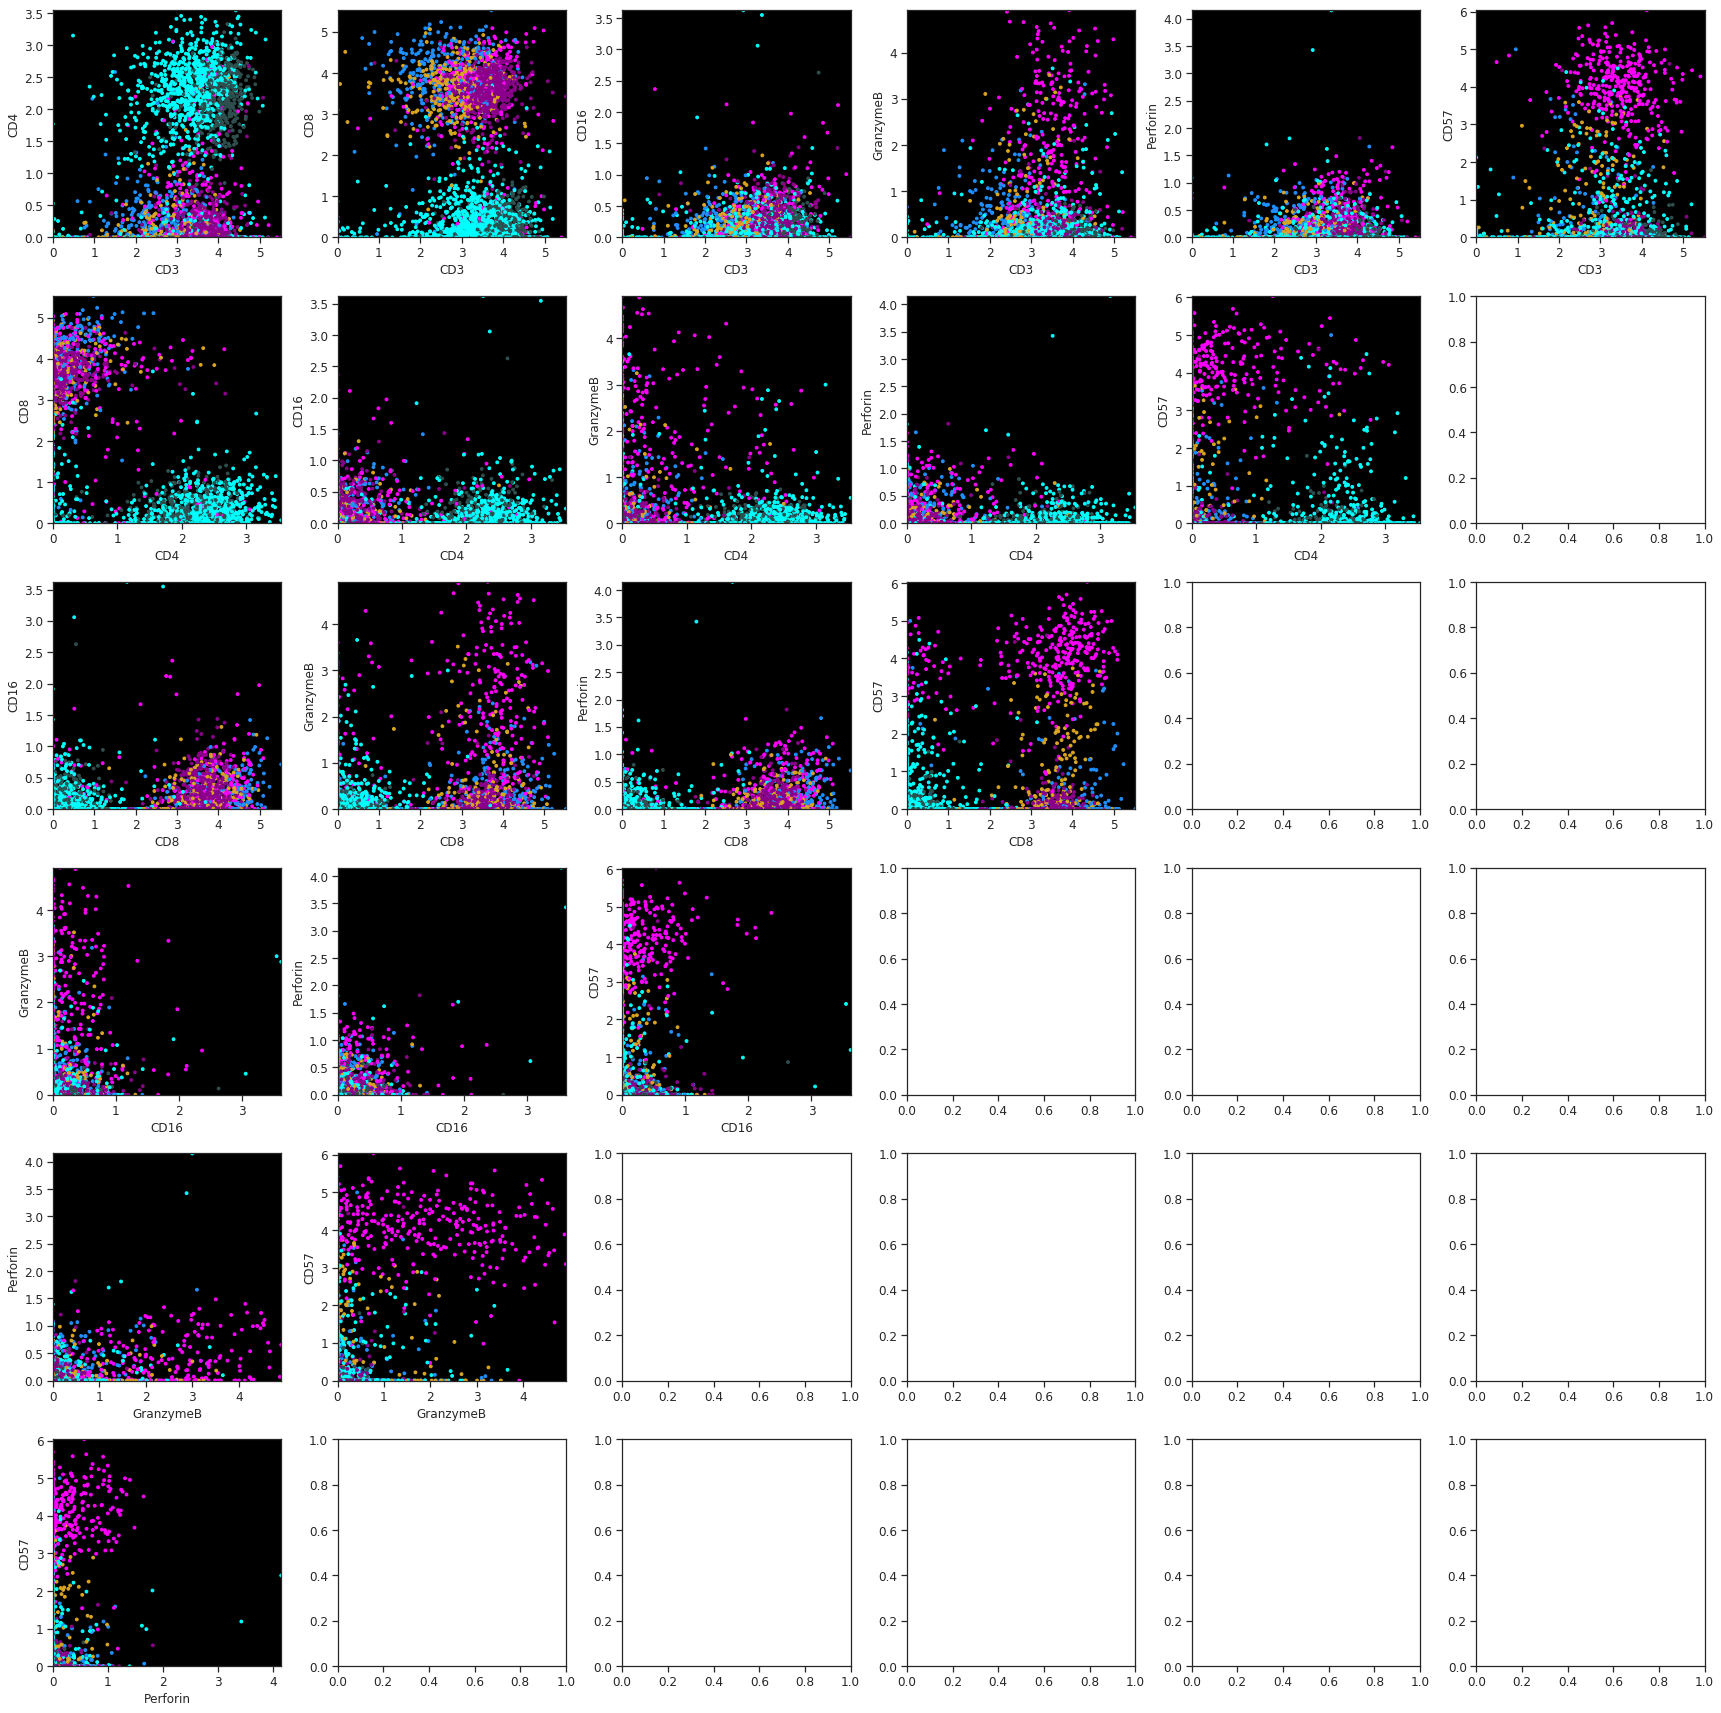

In [113]:
markers = ['CD3','CD4','CD8', 'CD16', 'GranzymeB', 'Perforin',  'CD57']
auto_twoD_plots(cell_dict['Tcells'], markers)